In [5]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

This time you are trying to optimise another four-dimensional black-box. It corresponds to the yield of a chemical process after processing in some factory. This type of process tends to be unimodal. Try to find the combination of chemicals that maximizes the yield!

In [6]:
X = np.load('../initial_data/function_5/initial_inputs.npy')
Y = np.load('../initial_data/function_5/initial_outputs.npy')

## Random Search

In [7]:
next_query = np.random.uniform(size=4)
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.272945-0.419834-0.477143-0.224131


## Upper Confidence Bound

In [8]:
gpr = GaussianProcessRegressor(kernel=None)
gpr.fit(X, Y)

# use gridsearch to optimise the acquisition function
x1 = np.linspace(0, 1, 5)
x2 = np.linspace(0, 1, 5)

dim=4
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1, dim)

mean, std = gpr.predict(X_grid, return_std=True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(f"next_query: {'-'.join(['%.6f' % x for x in next_query])}")

next_query: 0.750000-1.000000-1.000000-1.000000


## Visualising the data

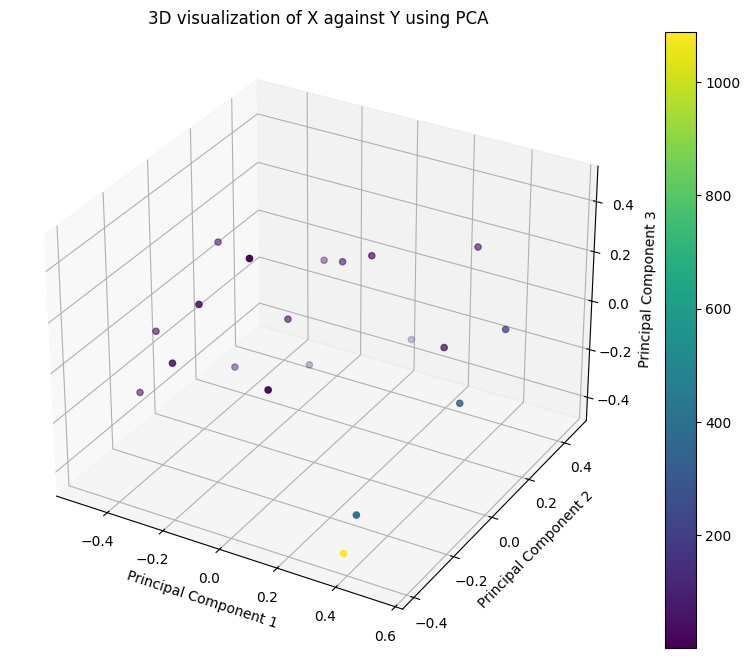

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Assume that 'X' is your 8-dimensional numpy array and 'Y' is your 1-dimensional array
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap='viridis')

# Add a colorbar
fig.colorbar(scatter)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D visualization of X against Y using PCA')
plt.show()